In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Conv1D,MaxPooling1D,UpSampling1D,Flatten,add
from tensorflow.keras.callbacks import ModelCheckpoint

from AD_tools import * # specifically need training()

In [2]:
plt.rcParams.update({
    'figure.figsize': (6,5),
    'font.size': 16,
    })

In [3]:
name = "3-0"

In [4]:
data = np.loadtxt("data/dataD10s_cut03.txt")
data.shape

(400, 43)

In [5]:
xx, yy = data[:,0], data[:,1]

In [6]:
sorter = np.argsort(xx)
xx, yy = xx[sorter], yy[sorter]

In [7]:
x_data = data[:,3:][sorter]

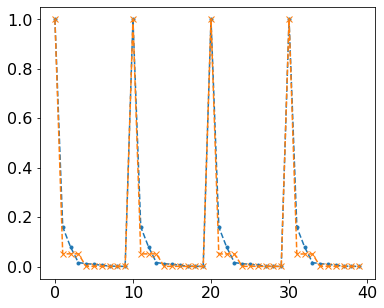

In [8]:
plt.plot(x_data[0],".--")
plt.plot(x_data[-1],"x--")

In [9]:
x_test = x_data.reshape((x_data.shape[0],4,10)).transpose((0,2,1))
x_test.shape

(400, 10, 4)

In [10]:
x_test = x_test[:,1:,:]
x_test.shape

(400, 9, 4)

In [11]:
shape_ = x_test.shape[1:]

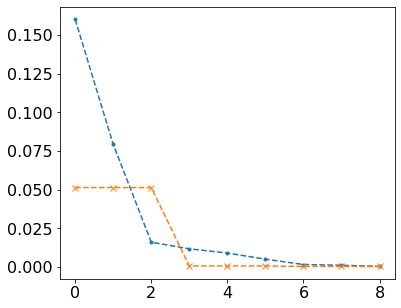

In [12]:
plt.plot(x_test[0,:,0],".--")
plt.plot(x_test[-1,:,0],"x--")

In [13]:
def picker(fillings, fmin, fmax):
    fillings = np.array(fillings)
    pickle = np.where((fillings>= fmin) & (fillings <= fmax))
    return pickle, fillings[pickle]

In [14]:
rate=0.2 # Dropout percentage
bottleneck = 50 # latent space dimension, does not make great differences
fully = True

In [15]:
def cnnx(loss,optimizer,activation0,activation,x_shape,dim1=(16,(3,)),dim2=(16,(3,)), fully=False):
    """ 
    Pretty Standard Convolutional Autoencoder with a fully-connected latent space
    activation0: Activations "inside" the CAE
    activation: Last activation (important depending on the range of the pixel values)
    """
    in_dim = x_shape
    input_img = Input(shape=in_dim)
   
    #x1 = Conv1D(*dim1, activation=activation0, padding='same')(input_img)
    #x2 = MaxPooling1D((2,), padding='same')(x1)
    #x2 = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    #x3 = MaxPooling1D((2,), padding='same')(x2)
    #encoded = Conv1D(*dim2, activation=activation0, padding='same')(x2)
    
    encoded = Flatten()(input_img)
    encoded = Dense(units=100,activation=activation0)(encoded)
    encoded = tf.keras.layers.Dropout(rate)(encoded)
    encoded = Dense(units=25,activation=activation0)(encoded)
    
    y = Dense(units=100,activation=activation0)(encoded)
    y = tf.keras.layers.Dropout(rate)(y)

    #y=UpSampling1D(2)(encoded)
    #y=Conv1D(*dim1, activation=activation0, padding='same')(y)
    #y=UpSampling1D(2)(y)
    decoded = Dense(np.prod(in_dim), activation=activation)(y)
    decoded = tf.keras.layers.Reshape(in_dim)(decoded)
    

    cnn = Model(input_img, decoded)
    cnn.compile(loss=loss,optimizer=optimizer)
    return cnn

In [16]:
# Show Network architecture
cnn = cnnx("mse","adam","linear","relu",x_shape=(10,4))
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 4)]           0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0     

In [17]:
def create_out(cnn1):
    """
    Creates (dim_freq, dim_phase) matrix of the output loss and the standard deviation
    """
    y_test = cnn1.predict(x_test)
    return 100*eval_loss(x_test,y_test,norm=norm2)/eval_loss(x_test,0*x_test,norm=norm2)

In [18]:
train1s = [(0,0.1),(0,0.3),(0,0.5),(0,0.7),(3.8,np.max(xx)),(3.5,np.max(xx)),(3.2,np.max(xx)),(2.8,np.max(xx)),(1.5,1.7),(1.4,1.8),(1.3,1.9)]

In [19]:
for i in range(len(x_test)):
    x_test[i] = x_test[i]/np.mean(x_test[i])

# Systematic approach

In [20]:
cnns = [None]*len(train1s)
outs = [None]*len(train1s)

10 400 4000
Epoch 1/400
1/1 [==============================] - 1s 848ms/step - loss: 3.7614 - val_loss: 3.3831
Epoch 2/400
1/1 [==============================] - 0s 37ms/step - loss: 3.6068 - val_loss: 3.2722
Epoch 3/400
1/1 [==============================] - 0s 36ms/step - loss: 3.4141 - val_loss: 3.1697
Epoch 4/400
1/1 [==============================] - 0s 41ms/step - loss: 3.3195 - val_loss: 3.0759
Epoch 5/400
1/1 [==============================] - 0s 43ms/step - loss: 3.3067 - val_loss: 2.9887
Epoch 6/400
1/1 [==============================] - 0s 44ms/step - loss: 3.1503 - val_loss: 2.8998
Epoch 7/400
1/1 [==============================] - 0s 47ms/step - loss: 3.0724 - val_loss: 2.8113
Epoch 8/400
1/1 [==============================] - 0s 42ms/step - loss: 2.9672 - val_loss: 2.7187
Epoch 9/400
1/1 [==============================] - 0s 56ms/step - loss: 2.7934 - val_loss: 2.6182
Epoch 10/400
1/1 [==============================] - 0s 35ms/step - loss: 2.7850 - val_loss: 2.5156
Epoch 

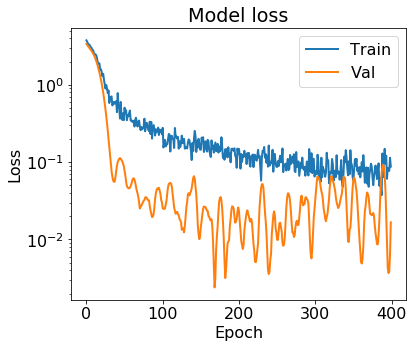

30 133 3990
Epoch 1/133
2/2 [==============================] - 0s 146ms/step - loss: 3.8118 - val_loss: 3.5935
Epoch 2/133
2/2 [==============================] - 0s 32ms/step - loss: 3.6040 - val_loss: 3.4823
Epoch 3/133
2/2 [==============================] - 0s 33ms/step - loss: 3.4761 - val_loss: 3.3886
Epoch 4/133
2/2 [==============================] - 0s 32ms/step - loss: 3.4295 - val_loss: 3.2878
Epoch 5/133
2/2 [==============================] - 0s 115ms/step - loss: 3.2553 - val_loss: 3.1705
Epoch 6/133
2/2 [==============================] - 0s 34ms/step - loss: 3.1437 - val_loss: 3.0281
Epoch 7/133
2/2 [==============================] - 0s 40ms/step - loss: 2.9840 - val_loss: 2.8590
Epoch 8/133
2/2 [==============================] - 0s 31ms/step - loss: 2.8115 - val_loss: 2.6497
Epoch 9/133
2/2 [==============================] - 0s 37ms/step - loss: 2.6020 - val_loss: 2.3957
Epoch 10/133
2/2 [==============================] - 0s 40ms/step - loss: 2.3901 - val_loss: 2.1167
Epoch

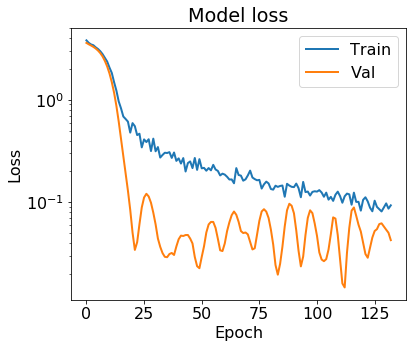

50 80 4000
Epoch 1/80
4/4 [==============================] - 1s 44ms/step - loss: 3.6734 - val_loss: 3.3223
Epoch 2/80
4/4 [==============================] - 0s 14ms/step - loss: 3.3621 - val_loss: 3.0799
Epoch 3/80
4/4 [==============================] - 0s 13ms/step - loss: 3.0750 - val_loss: 2.7728
Epoch 4/80
4/4 [==============================] - 0s 13ms/step - loss: 2.7368 - val_loss: 2.3692
Epoch 5/80
4/4 [==============================] - 0s 13ms/step - loss: 2.3193 - val_loss: 1.8768
Epoch 6/80
4/4 [==============================] - 0s 15ms/step - loss: 1.8902 - val_loss: 1.3317
Epoch 7/80
4/4 [==============================] - 0s 14ms/step - loss: 1.3804 - val_loss: 0.8111
Epoch 8/80
4/4 [==============================] - 0s 11ms/step - loss: 1.0126 - val_loss: 0.4102
Epoch 9/80
4/4 [==============================] - 0s 14ms/step - loss: 0.7653 - val_loss: 0.2007
Epoch 10/80
4/4 [==============================] - 0s 14ms/step - loss: 0.5709 - val_loss: 0.1160
Epoch 11/80
4/4 [=

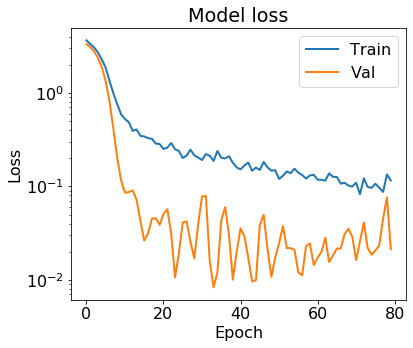

70 57 3990
Epoch 1/57
5/5 [==============================] - 1s 43ms/step - loss: 4.1788 - val_loss: 3.2183
Epoch 2/57
5/5 [==============================] - 0s 14ms/step - loss: 3.1267 - val_loss: 2.4928
Epoch 3/57
5/5 [==============================] - 0s 11ms/step - loss: 2.3980 - val_loss: 1.7604
Epoch 4/57
5/5 [==============================] - 0s 9ms/step - loss: 1.7698 - val_loss: 1.0181
Epoch 5/57
5/5 [==============================] - 0s 9ms/step - loss: 1.1638 - val_loss: 0.4218
Epoch 6/57
5/5 [==============================] - 0s 10ms/step - loss: 0.8338 - val_loss: 0.1433
Epoch 7/57
5/5 [==============================] - 0s 13ms/step - loss: 0.6294 - val_loss: 0.0527
Epoch 8/57
5/5 [==============================] - 0s 10ms/step - loss: 0.5079 - val_loss: 0.0635
Epoch 9/57
5/5 [==============================] - 0s 9ms/step - loss: 0.5120 - val_loss: 0.0999
Epoch 10/57
5/5 [==============================] - 0s 10ms/step - loss: 0.4397 - val_loss: 0.0986
Epoch 11/57
5/5 [====

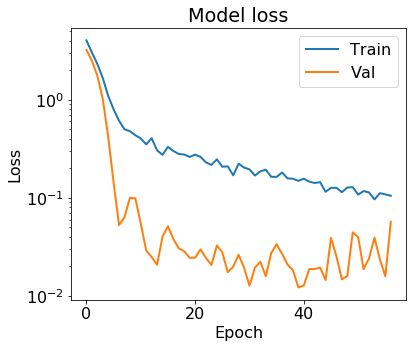

21 190 3990
Epoch 1/190
2/2 [==============================] - 1s 211ms/step - loss: 3.1797 - val_loss: 2.7874
Epoch 2/190
2/2 [==============================] - 0s 50ms/step - loss: 2.8973 - val_loss: 2.5576
Epoch 3/190
2/2 [==============================] - 0s 51ms/step - loss: 2.6896 - val_loss: 2.3650
Epoch 4/190
2/2 [==============================] - 0s 38ms/step - loss: 2.4058 - val_loss: 2.1641
Epoch 5/190
2/2 [==============================] - 0s 39ms/step - loss: 2.2382 - val_loss: 1.9527
Epoch 6/190
2/2 [==============================] - 0s 38ms/step - loss: 1.9693 - val_loss: 1.7249
Epoch 7/190
2/2 [==============================] - 0s 38ms/step - loss: 1.7657 - val_loss: 1.4847
Epoch 8/190
2/2 [==============================] - 0s 30ms/step - loss: 1.6042 - val_loss: 1.2397
Epoch 9/190
2/2 [==============================] - 0s 51ms/step - loss: 1.3594 - val_loss: 0.9968
Epoch 10/190
2/2 [==============================] - 0s 33ms/step - loss: 1.1359 - val_loss: 0.7667
Epoch 

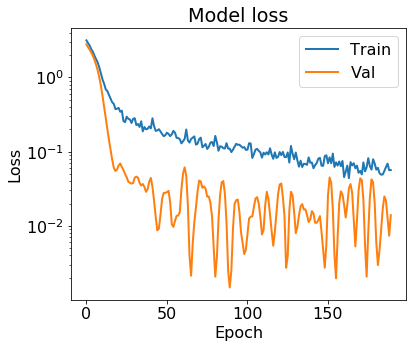

51 78 3978
Epoch 1/78
4/4 [==============================] - 0s 43ms/step - loss: 2.7681 - val_loss: 2.3566
Epoch 2/78
4/4 [==============================] - 0s 10ms/step - loss: 2.3031 - val_loss: 1.9498
Epoch 3/78
4/4 [==============================] - 0s 45ms/step - loss: 1.9050 - val_loss: 1.5119
Epoch 4/78
4/4 [==============================] - 0s 12ms/step - loss: 1.4793 - val_loss: 1.0463
Epoch 5/78
4/4 [==============================] - 0s 12ms/step - loss: 1.1171 - val_loss: 0.6307
Epoch 6/78
4/4 [==============================] - 0s 11ms/step - loss: 0.8414 - val_loss: 0.3592
Epoch 7/78
4/4 [==============================] - 0s 10ms/step - loss: 0.6446 - val_loss: 0.2107
Epoch 8/78
4/4 [==============================] - 0s 13ms/step - loss: 0.5677 - val_loss: 0.1135
Epoch 9/78
4/4 [==============================] - 0s 12ms/step - loss: 0.4582 - val_loss: 0.0629
Epoch 10/78
4/4 [==============================] - 0s 13ms/step - loss: 0.3897 - val_loss: 0.0616
Epoch 11/78
4/4 [=

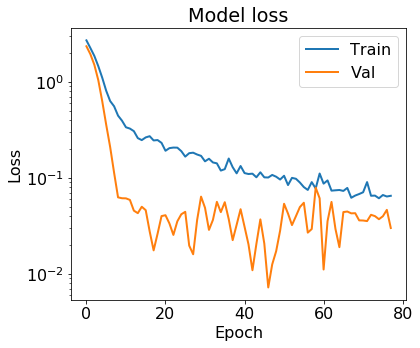

81 49 3969
Epoch 1/49
6/6 [==============================] - 0s 29ms/step - loss: 2.6558 - val_loss: 2.2082
Epoch 2/49
6/6 [==============================] - 0s 9ms/step - loss: 2.1609 - val_loss: 1.6453
Epoch 3/49
6/6 [==============================] - 0s 10ms/step - loss: 1.6016 - val_loss: 1.0002
Epoch 4/49
6/6 [==============================] - 0s 9ms/step - loss: 1.0998 - val_loss: 0.4988
Epoch 5/49
6/6 [==============================] - 0s 10ms/step - loss: 0.7313 - val_loss: 0.2345
Epoch 6/49
6/6 [==============================] - 0s 15ms/step - loss: 0.6126 - val_loss: 0.1074
Epoch 7/49
6/6 [==============================] - 0s 7ms/step - loss: 0.4148 - val_loss: 0.0976
Epoch 8/49
6/6 [==============================] - 0s 8ms/step - loss: 0.3146 - val_loss: 0.0803
Epoch 9/49
6/6 [==============================] - 0s 7ms/step - loss: 0.3160 - val_loss: 0.0594
Epoch 10/49
6/6 [==============================] - 0s 7ms/step - loss: 0.3096 - val_loss: 0.0222
Epoch 11/49
6/6 [=======

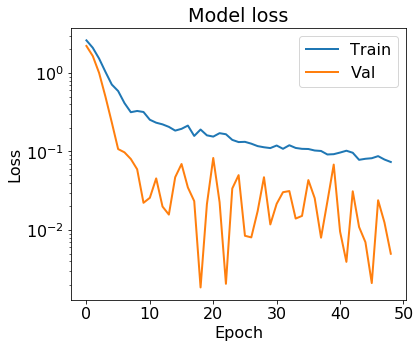

121 33 3993
Epoch 1/33
8/8 [==============================] - 1s 25ms/step - loss: 2.7617 - val_loss: 2.0700
Epoch 2/33
8/8 [==============================] - 0s 5ms/step - loss: 1.9236 - val_loss: 1.0359
Epoch 3/33
8/8 [==============================] - 0s 6ms/step - loss: 1.0306 - val_loss: 0.2703
Epoch 4/33
8/8 [==============================] - 0s 6ms/step - loss: 0.6347 - val_loss: 0.0638
Epoch 5/33
8/8 [==============================] - 0s 6ms/step - loss: 0.4275 - val_loss: 0.0863
Epoch 6/33
8/8 [==============================] - 0s 7ms/step - loss: 0.3325 - val_loss: 0.0371
Epoch 7/33
8/8 [==============================] - 0s 5ms/step - loss: 0.3133 - val_loss: 0.0110
Epoch 8/33
8/8 [==============================] - 0s 20ms/step - loss: 0.2535 - val_loss: 0.0377
Epoch 9/33
8/8 [==============================] - 0s 6ms/step - loss: 0.2244 - val_loss: 0.0125
Epoch 10/33
8/8 [==============================] - 0s 6ms/step - loss: 0.1995 - val_loss: 0.0120
Epoch 11/33
8/8 [========

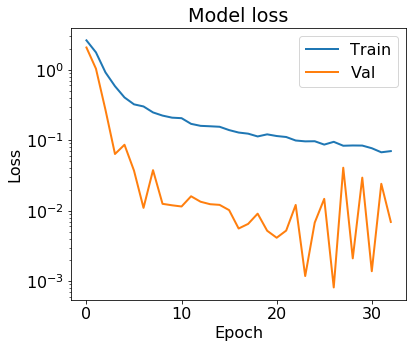

21 190 3990
Epoch 1/190
2/2 [==============================] - 0s 139ms/step - loss: 2.6642 - val_loss: 2.5062
Epoch 2/190
2/2 [==============================] - 0s 37ms/step - loss: 2.5492 - val_loss: 2.2770
Epoch 3/190
2/2 [==============================] - 0s 30ms/step - loss: 2.2614 - val_loss: 2.0540
Epoch 4/190
2/2 [==============================] - 0s 38ms/step - loss: 2.0898 - val_loss: 1.8297
Epoch 5/190
2/2 [==============================] - 0s 33ms/step - loss: 1.9687 - val_loss: 1.5987
Epoch 6/190
2/2 [==============================] - 0s 148ms/step - loss: 1.6616 - val_loss: 1.3560
Epoch 7/190
2/2 [==============================] - 0s 31ms/step - loss: 1.4411 - val_loss: 1.1150
Epoch 8/190
2/2 [==============================] - 0s 34ms/step - loss: 1.2543 - val_loss: 0.8815
Epoch 9/190
2/2 [==============================] - 0s 34ms/step - loss: 1.0045 - val_loss: 0.6609
Epoch 10/190
2/2 [==============================] - 0s 34ms/step - loss: 0.8798 - val_loss: 0.4683
Epoch

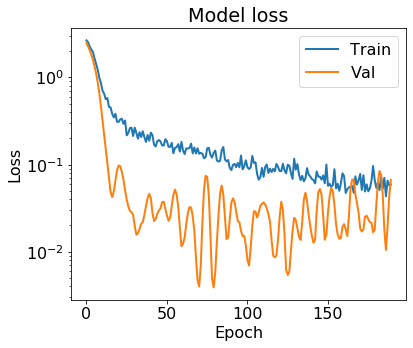

41 97 3977
Epoch 1/97
3/3 [==============================] - 0s 63ms/step - loss: 2.9576 - val_loss: 2.4489
Epoch 2/97
3/3 [==============================] - 0s 18ms/step - loss: 2.5172 - val_loss: 2.1362
Epoch 3/97
3/3 [==============================] - 0s 15ms/step - loss: 2.1760 - val_loss: 1.8351
Epoch 4/97
3/3 [==============================] - 0s 15ms/step - loss: 1.8591 - val_loss: 1.5138
Epoch 5/97
3/3 [==============================] - 0s 21ms/step - loss: 1.5697 - val_loss: 1.1731
Epoch 6/97
3/3 [==============================] - 0s 22ms/step - loss: 1.2710 - val_loss: 0.8380
Epoch 7/97
3/3 [==============================] - 0s 24ms/step - loss: 0.9760 - val_loss: 0.5338
Epoch 8/97
3/3 [==============================] - 0s 22ms/step - loss: 0.7995 - val_loss: 0.3106
Epoch 9/97
3/3 [==============================] - 0s 88ms/step - loss: 0.5637 - val_loss: 0.1748
Epoch 10/97
3/3 [==============================] - 0s 23ms/step - loss: 0.5026 - val_loss: 0.0973
Epoch 11/97
3/3 [=

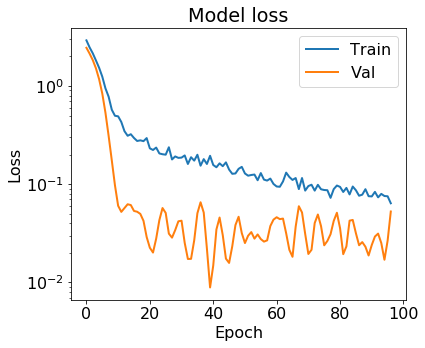

61 65 3965
Epoch 1/65
4/4 [==============================] - 0s 44ms/step - loss: 2.8702 - val_loss: 2.3950
Epoch 2/65
4/4 [==============================] - 0s 18ms/step - loss: 2.3624 - val_loss: 1.9927
Epoch 3/65
4/4 [==============================] - 0s 12ms/step - loss: 1.9386 - val_loss: 1.5423
Epoch 4/65
4/4 [==============================] - 0s 13ms/step - loss: 1.5417 - val_loss: 1.0599
Epoch 5/65
4/4 [==============================] - 0s 13ms/step - loss: 1.1554 - val_loss: 0.6299
Epoch 6/65
4/4 [==============================] - 0s 15ms/step - loss: 0.8526 - val_loss: 0.3442
Epoch 7/65
4/4 [==============================] - 0s 14ms/step - loss: 0.6396 - val_loss: 0.1837
Epoch 8/65
4/4 [==============================] - 0s 16ms/step - loss: 0.5026 - val_loss: 0.1021
Epoch 9/65
4/4 [==============================] - 0s 11ms/step - loss: 0.4253 - val_loss: 0.0854
Epoch 10/65
4/4 [==============================] - 0s 15ms/step - loss: 0.3805 - val_loss: 0.0856
Epoch 11/65
4/4 [=

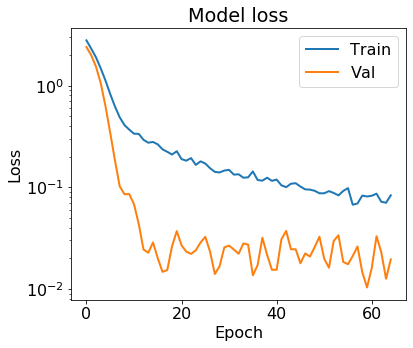

In [21]:
for i,train1 in enumerate(train1s):
    pickle, xx_train = picker(xx,*train1)
    x_train = x_test[pickle]
    num_epochs = 4000//len(x_train)
    print(len(x_train), num_epochs, len(x_train) * num_epochs)
    cnns[i] = training(x_train = x_train,choose_cnn = cnnx, name = name, provide_cnn = False,
                 load_prev= False, num_epochs = num_epochs,  verbose_val=1, batch_size = 16, shuffle=True, early=False,
                 loss="mse", activation0 = 'relu', activation = 'linear', optimizer = "adam",
                 dim1=(16,(3,)), dim2=(16,(3,)), x_shape = shape_)
    outs[i] = create_out(cnns[i])

In [22]:
outs = np.array(outs)

In [23]:
temp = np.load("data_results/3-0_data.npz",allow_pickle=True)

In [24]:
lims1 = np.min(outs[[0,1,2,3]]),np.max(outs[[0,1,2,3]])
lims2 = np.min(outs[[4,5,6,7]]),np.max(outs[[4,5,6,7]])
lims3 = np.min(outs[[8,9,10]]),np.max(outs[[8,9,10]])
lims = [lims1,lims2,lims3]

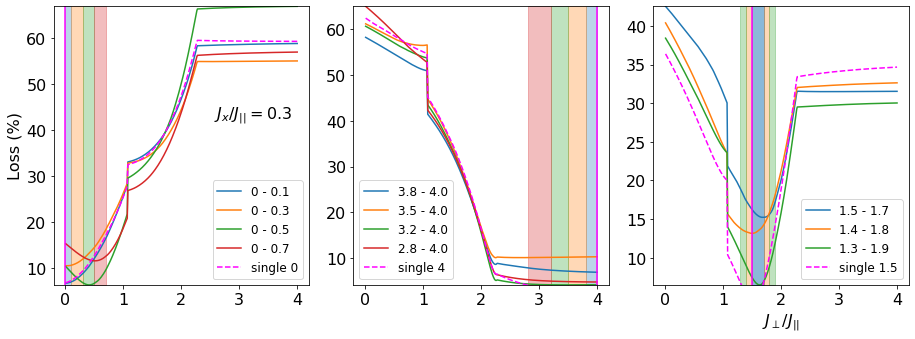

In [25]:
fig, axs = plt.subplots(ncols=3,figsize=(13,5),sharex=True)
color = ["tab:blue","tab:orange","tab:green","tab:red"]
picks = [[0,1,2,3],[4,5,6,7],[8,9,10,11]]
for i,train1 in enumerate(train1s):
    ax = axs[i//4]
    out = outs[i]
    ax.plot(xx,out,"-",label="{} - {}".format(*train1))
    plt.tight_layout()
x0,x1 = train1s[0]
axs[0].fill_between(*[(x0,x1)],*lims1,alpha=0.3,color=color[0])
for i in range(1,4):
    x0,x1 = x1,train1s[i][1]
    axs[0].fill_between(*[(x0,x1)],*lims1,alpha=0.3,color=color[i%4])
x0,x1 = train1s[4]
axs[1].fill_between(*[(x0,x1)],*lims2,alpha=0.3,color=color[0])
for i in range(5,8):
    x0,x1 = train1s[i][0],x0
    axs[1].fill_between(*[(x0,x1)],*lims2,alpha=0.3,color=color[i%4])
x0,x1 = train1s[8]
axs[2].fill_between(*[(x0,x1)],*lims3,alpha=0.3,color=color[0])
for i in range(9,11):
    x0,x1 = train1s[i][0],x0
    axs[2].fill_between(*[(x0,x1)],*lims3,alpha=0.3,color=color[i%4])
x0,x1 = train1s[8]
axs[2].fill_between(*[(x0,x1)],*lims3,alpha=0.3,color=color[0])
for i in range(9,11):
    x0,x1 = x1,train1s[i][1]
    axs[2].fill_between(*[(x0,x1)],*lims3,alpha=0.3,color=color[i%4])
for i,lim in enumerate([lims1,lims2,lims3]):
    axs[i].set_ylim(*lim)
    

singlex = [0,4,1.5]
for i in range(3):
    axs[i].plot(temp["xx"],temp["outs"][i],"--",color="magenta",label="single {}".format(singlex[i]))
    axs[i].plot([singlex[i]]*2,lims[i],"-",color="magenta")
    axs[i].legend(fontsize=12)

#for i in range(0,3):
#    axs[i].text(-0.07,1.02,str(i+1) + ")", transform = axs[i].transAxes)
axs[-1].set_xlabel("$J_\perp/J_{{||}}$")
axs[0].text(0.63,0.6,'$J_x/J_{{||}} = 0.3$', transform = axs[0].transAxes)
axs[0].set_ylabel("Loss (%)")
plt.tight_layout()

plt.savefig("plots/" + name + ".png")
plt.savefig("plots/" + name + ".pdf")